# Hodgkin-Huxley Model

<i>[The code is based on this implementation of Hodgkin-Huxley model](https://hodgkin-huxley-tutorial.readthedocs.io/en/latest/_static/Tutorial.html)</i>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [2]:
C_m = 1.0  # Membrane capacitance, in uF/cm^2
g_Na = 120.0  # Sodium (Na) maximum conductances, in mS/cm^2
g_K = 36.0  # Postassium (K) maximum conductances, in mS/cm^2
g_L =0.3  # Leak maximum conductances, in mS/cm^2
E_Na = 50.0 # Sodium (Na) Nernst reversal potentials, in mV
E_K = -77.0  # Postassium (K) Nernst reversal potentials, in mV
E_L = -54.387  # Leak Nernst reversal potentials, in mV


def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-0.1 * (V + 40.0)))


def beta_m(V):
    return 4.0 * np.exp(-0.0556 * (V + 65.0))


def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65.0))


def beta_h(V):
    return 1.0 / (1.0 + np.exp(-0.1 * (V + 35.0)))


def alpha_n(V):
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-0.1 * (V + 55.0)))


def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))


def I_Na(V, m, h):
    return g_Na * m ** 3 * h * (V - E_Na)


def I_K(V, n):
    return g_K  * n ** 4 * (V - E_K)


def I_L(V):
    return g_L * (V - E_L)


def derivatives(values, time, I):
    V, n, m, h = values
    
    dV_dt = (I(time) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dn_dt = alpha_n(V) * (1.0 - n) - beta_n(V) * n
    dm_dt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
    dh_dt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
    
    return dV_dt, dn_dt, dm_dt, dh_dt

In [3]:
def plot_results(V_, n_, m_, h_, I_Na_, I_K_, I_L):
    plt.figure(figsize=(15, 10))

    plt.subplot(4, 1, 1)
    plt.title('Hodgkin-Huxley Neuron')
    plt.ylabel('V (mV)')
    plt.plot(time, V_, 'k')


    plt.subplot(4, 1, 2)
    plt.ylabel('Current')
    plt.plot(time, I_Na_, 'c', label='$I_{Na}$')
    plt.plot(time, I_K_, 'y', label='$I_{K}$')
    plt.plot(time, I_L_, 'm', label='$I_{L}$')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.ylabel('Gating Value')
    plt.plot(time, m_, 'r', label='m')
    plt.plot(time, h_, 'g', label='h')
    plt.plot(time, n_, 'b', label='n')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.xlabel('t (ms)')
    plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
    I_ = list(map(I, time))
    plt.plot(time, I_, 'k')

    plt.show()

## Simulation #1

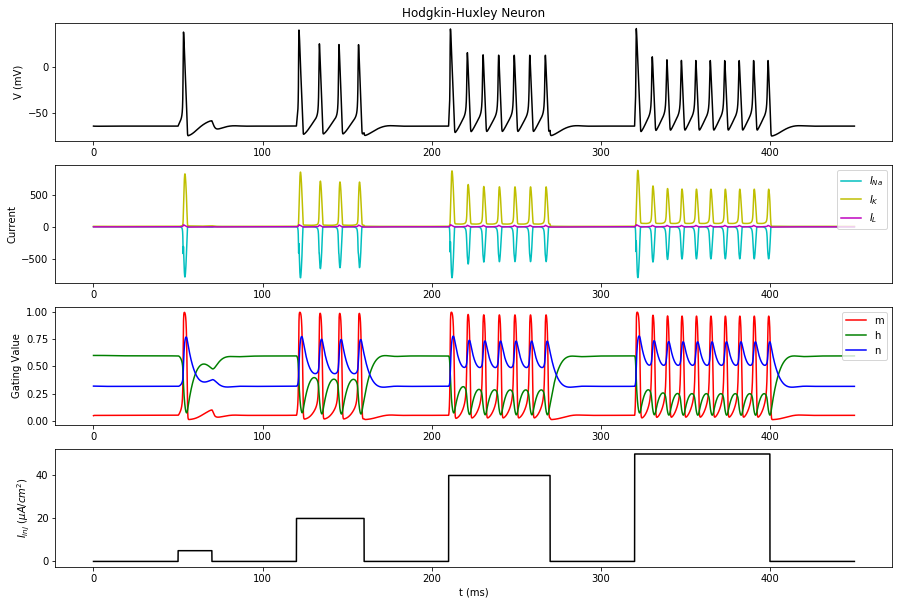

In [4]:
def I(t):
    if t < 50:
        return 0
    
    if t < 70:
        return 5
    
    if t < 120:
        return 0
    
    if t < 160:
        return 20
    
    if t < 210:
        return 0
    
    if t < 270:
        return 40
    
    if t < 320:
        return 0
    
    if t < 400:
        return 50
    
    return 0


time = np.arange(0.0, 450.0, 0.005)
y = odeint(derivatives, [-65, 0.32, 0.05, 0.6], time, args=(I,))

V_, n_, m_, h_ = y.T
I_Na_ = I_Na(V_, m_, h_)
I_K_ = I_K(V_, n_)
I_L_ = I_L(V_)

plot_results(V_, n_, m_, h_, I_Na_, I_K_, I_L_)

## Simulation #2

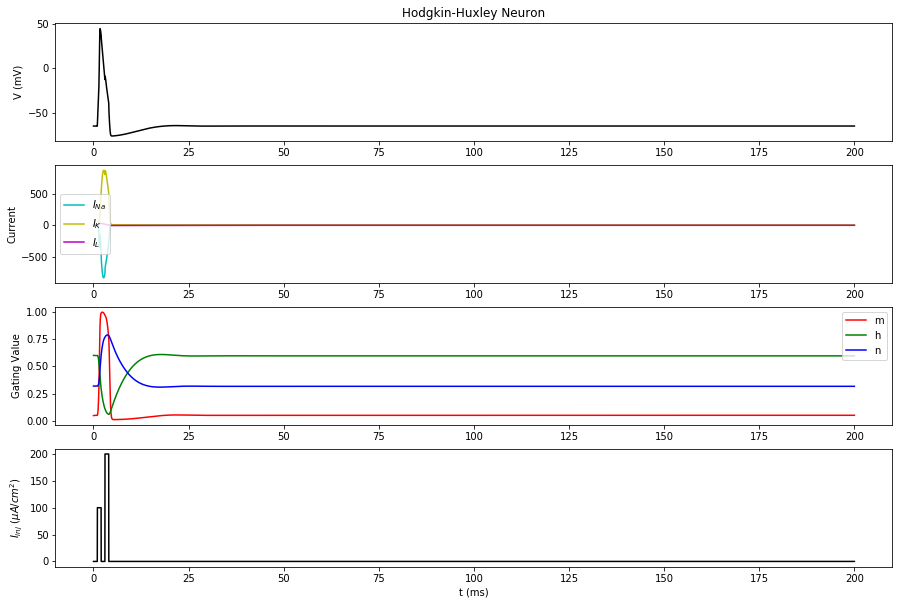

In [5]:
def I(t):
    if t < 1:
        return 0
    
    if t < 2:
        return 100
    
    if t < 3:
        return 0
    
    if t < 4:
        return 200
    
    return 0


time = np.arange(0.0, 200.0, 0.005)
y = odeint(derivatives, [-65, 0.32, 0.05, 0.6], time, args=(I,))

V_, n_, m_, h_ = y.T
I_Na_ = I_Na(V_, m_, h_)
I_K_ = I_K(V_, n_)
I_L_ = I_L(V_)

plot_results(V_, n_, m_, h_, I_Na_, I_K_, I_L_)